In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('/Users/owencrew/Downloads/rfm_data.csv')

In [20]:
print(df.head)

<bound method NDFrame.head of        user_crm_id                 city user_gender registration_date  \
0          6830383         City - Other           F        2021-06-07   
1          3881836               London           M        2021-10-17   
2          8182615            Blackpool           F        2022-12-08   
3          7858742          Bournemouth           M        2022-05-17   
4          2806068              Croydon           M        2020-10-02   
...            ...                  ...         ...               ...   
35317      8346122  Newcastle upon Tyne           F        2022-09-16   
35318      7679843            Liverpool     Unknown        2022-03-02   
35319      6283969               London     Unknown        2022-03-18   
35320      7827582           Birmingham           F        2022-05-05   
35321      7817550           Birmingham           M        2022-05-01   

      latest_login_date first_purchase_date latest_purchase_date  \
0            2022-12-20  

In [8]:
rfm_scores = df[['Recency', 'Frequency', 'Monetary']]

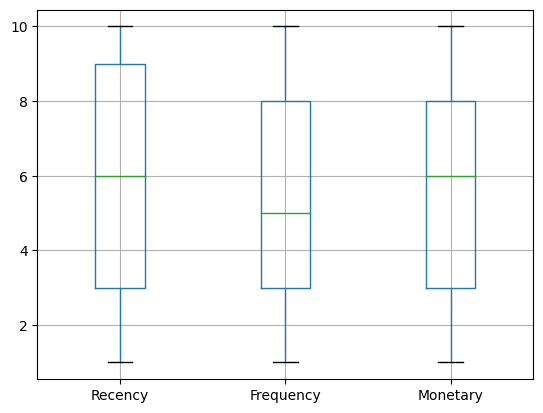

In [9]:
rfm_scores.boxplot()
plt.show()

In [10]:
rfm_data = df[['user_crm_id', 'Recency', 'Frequency', 'Monetary']]

In [11]:
# Normalize the RFM scores
rfm_data_norm = (rfm_data - rfm_data.mean()) / rfm_data.std()

In [14]:
# Create a k-means object with 3 clusters
kmeans = KMeans(n_clusters=3)

In [15]:
# Fit the k-means object to the normalized RFM data
kmeans.fit(rfm_data_norm)

/Users/owencrew/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
# Add cluster labels to the original DataFrame
rfm_data['cluster'] = kmeans.labels_

/var/folders/kg/2xrn8kzj23540fd5f2xnnr4h0000gn/T/ipykernel_12102/2385347520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['cluster'] = kmeans.labels_


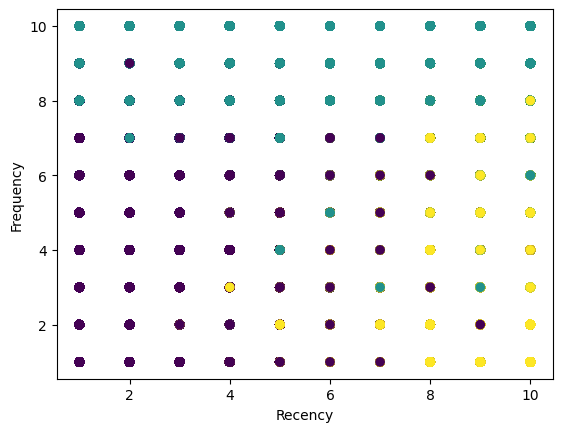

In [17]:
# Plot the clusters
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], c=rfm_data['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()